## Strategy v0.2
#### @19-07-2023

## Level-01

#### Pre-req - 
    1.  a.) Use DF rows at or after first 40 mins
        b.) loop for all >40 every minute for stocks

#### Process Steps:
    2. Aroon > 80 && have touched 100 in last 10 mins
        2.a. If Yes - eligible for trade && move to the next step
    3. MACD > 0 && MACD > macd-signal
    4. ADX 
        ADX above 20 and DI+ above DI-: That's an uptrend.
        ADX above 20 and DI- above DI+: That's a downtrend.
        ADX below 20 is a weak trend or ranging period
    5. RSI > 70 && moving downward - Sell signal
        Else if RSI < 30 && moving upward after getting below 30  -> Buy signal
    6. STO < 20 and trending upward -> Buy
          Else if STO > 80 and trending downward -> short sell
    7. OBV following trend - confirmation to go along
          else if diverging - trend reversal expected
    8. A/D - if going up - Buy
        8.a elseif going down - sell
        elseif diverging - trend reversal   
  


In [2]:
# imports
import pandas as pd
import pandas_datareader.data as pdr
import datetime
import talib as ta
from talib.abstract import *
from talib import MA_Type

import matplotlib.pyplot as plt 
plt.style.use('bmh')

In [15]:
# use CSV from system
# aapl = pd.read_csv('SBIN.csv')
aapl = pd.read_csv('ticker_MSFT.csv')
aapl

,Datetime,Open,High,Low,Close,Adj Close,Volume,ticker
0,2023-07-19 09:30:00-04:00,361.750000,362.057495,360.369995,361.734985,361.734985,1761019,MSFT
1,2023-07-19 09:31:00-04:00,361.700012,362.429993,361.660004,362.200012,362.200012,355335,MSFT
2,2023-07-19 09:32:00-04:00,362.269501,362.459991,361.890015,362.000000,362.000000,301865,MSFT
3,2023-07-19 09:33:00-04:00,362.000000,362.000000,360.161804,360.204987,360.204987,307317,MSFT
4,2023-07-19 09:34:00-04:00,360.160004,360.204987,358.630005,358.894989,358.894989,392916,MSFT
...,...,...,...,...,...,...,...,...
397,2023-07-20 09:37:00-04:00,356.614990,356.949402,356.355011,356.459991,356.459991,126986,MSFT
398,2023-07-20 09:38:00-04:00,356.415009,357.970001,356.059998,356.478699,356.478699,100587,MSFT
399,2023-07-20 09:39:00-04:00,356.410004,356.950012,356.179993,356.700012,356.700012,122182,MSFT
400,2023-07-20 09:40:00-04:00,356.670013,357.438293,356.511414,356.970001,356.970001,168020,MSFT


In [16]:
len(aapl)

402

In [17]:
# Making hr_mins as index
aapl['hr_mins'] = aapl['Datetime'][11:13] + aapl['Datetime'][14:16]

for i in range(len(aapl)):
    aapl['hr_mins'][i] = aapl['Datetime'][i][11:13] + aapl['Datetime'][i][14:16]
    
aapl.set_index('hr_mins', inplace=True)


C:\Users\DELL\AppData\Local\Temp\ipykernel_14088\20015611.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aapl['hr_mins'][i] = aapl['Datetime'][i][11:13] + aapl['Datetime'][i][14:16]


In [28]:
aapl

,Datetime,Open,High,Low,Close,Adj Close,Volume,ticker,OBV,AD,...,aroonup,macd,macdsignal,macdhist,adx,PLUS_DI,MINUS_DI,RSI,slowk,slowd
hr_mins,,,,,,,,,,,,,,,,,,,,,
0930,2023-07-19 09:30:00-04:00,361.750000,362.057495,360.369995,361.734985,361.734985,1761019,MSFT,1761019.0,1.087898e+06,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0931,2023-07-19 09:31:00-04:00,361.700012,362.429993,361.660004,362.200012,362.200012,355335,MSFT,2116354.0,1.230970e+06,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0932,2023-07-19 09:32:00-04:00,362.269501,362.459991,361.890015,362.000000,362.000000,301865,MSFT,1814489.0,1.045603e+06,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0933,2023-07-19 09:33:00-04:00,362.000000,362.000000,360.161804,360.204987,360.204987,307317,MSFT,1507172.0,7.527253e+05,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0934,2023-07-19 09:34:00-04:00,360.160004,360.204987,358.630005,358.894989,358.894989,392916,MSFT,1114256.0,4.920223e+05,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0937,2023-07-20 09:37:00-04:00,356.614990,356.949402,356.355011,356.459991,356.459991,126986,MSFT,35845.0,8.063406e+05,...,100.000000,0.185540,0.035759,0.149781,19.291032,34.565816,19.089889,61.093716,84.788842,79.108182
0938,2023-07-20 09:38:00-04:00,356.415009,357.970001,356.059998,356.478699,356.478699,100587,MSFT,136432.0,7.498539e+05,...,100.000000,0.234302,0.075468,0.158835,20.948846,38.199444,15.413646,61.261636,82.756515,82.135129
0939,2023-07-20 09:39:00-04:00,356.410004,356.950012,356.179993,356.700012,356.700012,122182,MSFT,258614.0,7.926989e+05,...,92.857143,0.287491,0.117872,0.169619,22.488246,35.252056,14.224362,63.280748,74.253699,80.599685


### Step 1 - Pre-requisites
    a.) Use DF rows at or after first 40 mins
    b.) Update DF with required columns

In [19]:
# aapl2 = aapl
# aapl = aapl[0:40]

In [20]:
# Add All indicator columns

# OBV - On Balance Volume
aapl['OBV'] = OBV(aapl['Close'], aapl['Volume'])

# Accumulation and Distribution line - Chaikin A/D Line
aapl['AD'] = AD(aapl['High'], aapl['Low'], aapl['Close'], aapl['Volume'])

# AROON Indicator
aapl['aroondown'], aapl['aroonup'] = AROON(aapl['High'], aapl['Low'], timeperiod=14)

# MACD
aapl['macd'], aapl['macdsignal'], aapl['macdhist'] = MACD(aapl['Close'], fastperiod=12, slowperiod=26, signalperiod=9)

# ADX Indicator
aapl['adx']  = ADX(aapl['High'], aapl['Low'], aapl['Close'], timeperiod=14)
aapl['PLUS_DI'] = PLUS_DI(aapl['High'], aapl['Low'], aapl['Close'], timeperiod=14)
aapl['MINUS_DI'] = MINUS_DI(aapl['High'], aapl['Low'], aapl['Close'], timeperiod=14)

# RSI
aapl['RSI'] = ta.RSI(aapl['Close'],14) 

# Stochastic
aapl['slowk'], aapl['slowd'] = ta.STOCH(aapl['High'], aapl['Low'], aapl['Close'], fastk_period=14, slowk_period=3, 
                                        slowk_matype=0, slowd_period=3, slowd_matype=0)




In [21]:
aapl

,Datetime,Open,High,Low,Close,Adj Close,Volume,ticker,OBV,AD,...,aroonup,macd,macdsignal,macdhist,adx,PLUS_DI,MINUS_DI,RSI,slowk,slowd
hr_mins,,,,,,,,,,,,,,,,,,,,,
0930,2023-07-19 09:30:00-04:00,361.750000,362.057495,360.369995,361.734985,361.734985,1761019,MSFT,1761019.0,1.087898e+06,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0931,2023-07-19 09:31:00-04:00,361.700012,362.429993,361.660004,362.200012,362.200012,355335,MSFT,2116354.0,1.230970e+06,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0932,2023-07-19 09:32:00-04:00,362.269501,362.459991,361.890015,362.000000,362.000000,301865,MSFT,1814489.0,1.045603e+06,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0933,2023-07-19 09:33:00-04:00,362.000000,362.000000,360.161804,360.204987,360.204987,307317,MSFT,1507172.0,7.527253e+05,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0934,2023-07-19 09:34:00-04:00,360.160004,360.204987,358.630005,358.894989,358.894989,392916,MSFT,1114256.0,4.920223e+05,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0937,2023-07-20 09:37:00-04:00,356.614990,356.949402,356.355011,356.459991,356.459991,126986,MSFT,35845.0,8.063406e+05,...,100.000000,0.185540,0.035759,0.149781,19.291032,34.565816,19.089889,61.093716,84.788842,79.108182
0938,2023-07-20 09:38:00-04:00,356.415009,357.970001,356.059998,356.478699,356.478699,100587,MSFT,136432.0,7.498539e+05,...,100.000000,0.234302,0.075468,0.158835,20.948846,38.199444,15.413646,61.261636,82.756515,82.135129
0939,2023-07-20 09:39:00-04:00,356.410004,356.950012,356.179993,356.700012,356.700012,122182,MSFT,258614.0,7.926989e+05,...,92.857143,0.287491,0.117872,0.169619,22.488246,35.252056,14.224362,63.280748,74.253699,80.599685


## TA01. OBV 
    following trend - confirmation to go along
      else if diverging - trend reversal expected
#### @TODO - need to check for false signals

In [12]:
# OBV
i = 40
obv = 0

price_trend = (aapl.iloc[i]['Close'] - aapl.iloc[i-10]['Close'])/(aapl.iloc[i-10]['Close'])

obv_trend = (aapl.iloc[i]['OBV'] - aapl.iloc[i-10]['OBV'])/(aapl.iloc[i-10]['OBV'])

if((aapl.iloc[i]['OBV'] > aapl.iloc[i-5]['OBV']) and (aapl.iloc[i]['Close'] > aapl.iloc[i-5]['Close'])):
    obv = 1
elif((aapl.iloc[i]['OBV'] > aapl.iloc[i-5]['OBV']) and (aapl.iloc[i]['Close'] < aapl.iloc[i-5]['Close'])):
    obv = 36
elif((aapl.iloc[i]['OBV'] < aapl.iloc[i-5]['OBV']) and (aapl.iloc[i]['Close'] > aapl.iloc[i-5]['Close'])):
    obv = 36
elif((price_trend > 1.4*obv_trend) or (1.4*price_trend < obv_trend)):
    obv = 36
else:
    obv = 0

    
print("obv = ", obv, " ", aapl.iloc[i]['OBV'], " ", aapl.iloc[i-5]['OBV']
      , " ", aapl.iloc[i]['Close'], " ", aapl.iloc[i-5]['Close']
     , " ", price_trend, " ", obv_trend) 


obv =  36   137756.0   153030.0   589.0499877929688   589.2000122070312   -0.0016101901814088984   -0.4869938590905198


## TA02. A/D  
    if going up - Buy
        elseif going down - sell
        elseif diverging - trend reversal   

In [14]:
# AD
i = 40
adv = 0

price_trend = (aapl.iloc[i]['Close'] - aapl.iloc[i-10]['Close'])/(aapl.iloc[i-10]['Close'])

ad_trend = (aapl.iloc[i]['AD'] - aapl.iloc[i-10]['AD'])/(aapl.iloc[i-10]['AD'])

if((aapl.iloc[i]['AD'] > aapl.iloc[i-5]['AD']) and (aapl.iloc[i]['Close'] > aapl.iloc[i-5]['Close'])):
    adv = 1
elif((aapl.iloc[i]['AD'] > aapl.iloc[i-5]['AD']) and (aapl.iloc[i]['Close'] < aapl.iloc[i-5]['Close'])):
    adv = 36
elif((aapl.iloc[i]['AD'] < aapl.iloc[i-5]['AD']) and (aapl.iloc[i]['Close'] > aapl.iloc[i-5]['Close'])):
    adv = 36
elif((price_trend > 1.4*obv_trend) or (1.4*price_trend < obv_trend)):
    adv = 36
else:
    adv = 0

    
print("adv = ", adv, " ", aapl.iloc[i]['AD'], " ", aapl.iloc[i-5]['AD']
      , " ", aapl.iloc[i]['Close'], " ", aapl.iloc[i-5]['Close']
     , " ", price_trend, " ", obv_trend) 

adv =  36   237850.01467899355   287632.77452031185   589.0499877929688   589.2000122070312   -0.0016101901814088984   -0.4869938590905198


### TA03. Aroon > 80 && have touched 100 in last 10 mins

In [7]:
i = 40
ar100 = 'N'
arup = aapl.iloc[i]['aroonup']
aroon = 0

for n in range(i-10,i):
    if(aapl.iloc[n]['aroonup'] == 100):
        ar100 = 'Y'
        
# print(arup, " ", ar80)

if((arup > 80) and (ar100 == "Y") ):
    aroon = 1
 

print(aroon, " ", arup)

0   0.0


## TA04. MACD > 0 && MACD > macd-signal

In [8]:
i = 40
macd = 0

macdval = aapl.iloc[i]['macd']
macdsignal = aapl.iloc[i]['macdsignal']

if((macdval >0) and (macdval > macdsignal)):
    macd = 1
    
print("macd = ", macd)

macd =  0


## TA05. ADX 

        ADX above 20 and DI+ above DI-: That's an uptrend.
        ADX above 20 and DI- above DI+: That's a downtrend.
        ADX below 20 is a weak trend or ranging period


In [9]:
# adx, PLUS_DI, MINUS_DI
i= 49
adx = 0

adxval = aapl.iloc[i]['adx']
plusdi = aapl.iloc[i]['PLUS_DI']
minusdi = aapl.iloc[i]['MINUS_DI']

print(adxval, " ", plusdi, " ", minusdi)

if((adxval >= 20) and (plusdi > minusdi)):
    adx = 1
elif((adxval >= 20) and (plusdi < minusdi)):
    adx = -1
else:
    adx = 0

print("adx val: ", adx)

25.695466544762446   12.425365892894785   40.48714624521509
adx val:  -1


## TA06. RSI
    RSI > 70 && moving downward - Sell signal
    Else if RSI < 30 && moving upward after getting below 30  -> Buy signal

In [ ]:
# RSI
# i = 40
rsi = 0

for i in range(0, 375):
    if((aapl.iloc[i]['RSI'] > 70) and (aapl.iloc[i]['RSI'] < aapl.iloc[i-5]['RSI'])):
        rsi = -1
    elif((aapl.iloc[i]['RSI'] < 30) and (aapl.iloc[i]['RSI'] > aapl.iloc[i-5]['RSI'])):
        rsi = 1
    else:
        rsi = 0

    print(aapl.iloc[i]['Datetime'], " ", aapl.iloc[i]['RSI'],
          " rsi = ", rsi, " ", aapl.iloc[i]['RSI'], " ", aapl.iloc[i-10]['RSI']) 

## TA07. Stochastic Oscillator
    STO < 20 and trending upward -> Buy
    Else if STO > 80 and trending downward -> short sell
    slowk - fast stochastic indicator (14 days data)
    slowd - slow stochastic indicator (3-period moving average of %K)



In [11]:
# STO - slowk, slowd
i = 40
stoch = 0

if((aapl.iloc[i]['slowk'] > 80) and (aapl.iloc[i]['slowk'] < aapl.iloc[i]['slowd'])):
    stoch = -1
elif((aapl.iloc[i]['slowk'] < 30) and (aapl.iloc[i]['slowk'] > aapl.iloc[i]['slowd'])):
    stoch = 1
else:
    stoch = 0

    
print("stoch = ", stoch, " ", aapl.iloc[i]['slowk'], " ", aapl.iloc[i-10]['slowd']) 

stoch =  1   16.904887127543613   18.45752205361549


In [ ]:
aapl.tail()

## Combined Run 01 - 
    @19-Jul-2023

### Trend Indicators
    1. Aroon
    2. MACD
    3. ADX
### Momentum
    1. RSI
    2. Stochastic
### Volume
    1. OBV
    2. A/D

In [ ]:
# Trend Indicator
aroon = 0
arup = 0
macd = 0
macdval = 0
macdsignal = 0
adx = 0
plusdi = 0
minusdi = 0

# Momentum
rsi = 0
stoch = 0

# Volume
adv = 0
obv = 0

for i in range (51, 301):
    
#  Checking for momentum indicators
    # Aroon Setup
    ar100 = 'N'
    arup = aapl.iloc[i]['aroonup']
    aroon = 0

    for n in range(i-10,i):
        if(aapl.iloc[n]['aroonup'] == 100):
            ar100 = 'Y'
    if((arup > 80) and (ar100 == "Y") ):
        aroon = 1 
    
#     print(aapl.iloc[i]['Datetime'], " ", aroon, " ", arup)
    
    # MACD
    macd = 0
    macdval = aapl.iloc[i]['macd']
    macdsignal = aapl.iloc[i]['macdsignal']

    if((macdval >0) and (macdval > macdsignal)):
        macd = 1
        
    # ADX
    adx = 0

    adxval = aapl.iloc[i]['adx']
    plusdi = aapl.iloc[i]['PLUS_DI']
    minusdi = aapl.iloc[i]['MINUS_DI']

    if((adxval >= 20) and (plusdi > minusdi)):
        adx = 1
    elif((adxval >= 20) and (plusdi < minusdi)):
        adx = -1
    else:
        adx = 0
    
    if(aroon >=1 and macd >=1 and adx >=1):
        print(aapl.iloc[i]['Datetime'], " aroon:", aroon, " macd:", macd, " ", macdval, " ", macdsignal , " adx:", adx)

####  Checking for momentum indicators
    # RSI
    if((aapl.iloc[i]['RSI'] > 70) and (aapl.iloc[i]['RSI'] < aapl.iloc[i-5]['RSI'])):
        rsi = -1
    elif((aapl.iloc[i]['RSI'] < 30) and (aapl.iloc[i]['RSI'] > aapl.iloc[i-5]['RSI'])):
        rsi = 1
    else:
        rsi = 0

    # STO - slowk, slowd
    if((aapl.iloc[i]['slowk'] > 80) and (aapl.iloc[i]['slowk'] < aapl.iloc[i]['slowd'])):
        stoch = -1
    elif((aapl.iloc[i]['slowk'] < 30) and (aapl.iloc[i]['slowk'] > aapl.iloc[i]['slowd'])):
        stoch = 1
    else:
        stoch = 0
    
    if(RSI == 1 and stoch == 1):
        print(aapl.iloc[i]['Datetime'], " aroon:", aroon, " macd:", macd,  " adx:", adx," RSI:", rsi , " stoch:", stoch)
    
# Checking for Volume indicators
    # OBV
    

    price_trend = (aapl.iloc[i]['Close'] - aapl.iloc[i-10]['Close'])/(aapl.iloc[i-10]['Close'])

    obv_trend = (aapl.iloc[i]['OBV'] - aapl.iloc[i-10]['OBV'])/(aapl.iloc[i-10]['OBV'])

    if((aapl.iloc[i]['OBV'] > aapl.iloc[i-5]['OBV']) and (aapl.iloc[i]['Close'] > aapl.iloc[i-5]['Close'])):
        obv = 1
    elif((aapl.iloc[i]['OBV'] > aapl.iloc[i-5]['OBV']) and (aapl.iloc[i]['Close'] < aapl.iloc[i-5]['Close'])):
        obv = 36
    elif((aapl.iloc[i]['OBV'] < aapl.iloc[i-5]['OBV']) and (aapl.iloc[i]['Close'] > aapl.iloc[i-5]['Close'])):
        obv = 36
    elif((price_trend > 1.4*obv_trend) or (1.4*price_trend < obv_trend)):
        obv = 36
    else:
        obv = 0
    
    # A/D
    # -----
    price_trend = (aapl.iloc[i]['Close'] - aapl.iloc[i-10]['Close'])/(aapl.iloc[i-10]['Close'])

    ad_trend = (aapl.iloc[i]['AD'] - aapl.iloc[i-10]['AD'])/(aapl.iloc[i-10]['AD'])

    if((aapl.iloc[i]['AD'] > aapl.iloc[i-5]['AD']) and (aapl.iloc[i]['Close'] > aapl.iloc[i-5]['Close'])):
        adv = 1
    elif((aapl.iloc[i]['AD'] > aapl.iloc[i-5]['AD']) and (aapl.iloc[i]['Close'] < aapl.iloc[i-5]['Close'])):
        adv = 36
    elif((aapl.iloc[i]['AD'] < aapl.iloc[i-5]['AD']) and (aapl.iloc[i]['Close'] > aapl.iloc[i-5]['Close'])):
        adv = 36
    elif((price_trend > 1.4*obv_trend) or (1.4*price_trend < obv_trend)):
        adv = 36
    else:
        adv = 0
        
    if(obv >= 1 and adv >= 1):
        print(aapl.iloc[i]['Datetime'], " aroon:", aroon, " macd:", macd,  " adx:", adx
              ," RSI:", rsi , " stoch:", stoch, " OBV:", obv, " adv:", obv)
    

## Combined Run 02:
    @20-Jul-2023

In [33]:
# Approach: 02 - Make all the three indicator groups independent

# Trend Indicator
aroon = 0
arup = 0
macd = 0
macdval = 0
macdsignal = 0
adx = 0
plusdi = 0
minusdi = 0

# Momentum
rsi = 0
stoch = 0

# Volume
adv = 0
obv = 0

# index range
start = 0
end = 375

for i in range (start, end):
    
# Checking for Volume indicators
    # OBV
    price_trend = 0  # used by OBV as well as A/D
    obv_trend = 0
    adv_trend = 0
    
    
    if((aapl.iloc[i-10]['Close']) != 0):    
        price_trend = (aapl.iloc[i]['Close'] - aapl.iloc[i-10]['Close'])/(aapl.iloc[i-10]['Close'])
    
    if((aapl.iloc[i-10]['OBV']) != 0):
        obv_trend = (aapl.iloc[i]['OBV'] - aapl.iloc[i-10]['OBV'])/(aapl.iloc[i-10]['OBV'])

    if((aapl.iloc[i]['OBV'] > aapl.iloc[i-5]['OBV']) and (aapl.iloc[i]['Close'] > aapl.iloc[i-5]['Close'])):
        obv = 1
    elif((aapl.iloc[i]['OBV'] > aapl.iloc[i-5]['OBV']) and (aapl.iloc[i]['Close'] < aapl.iloc[i-5]['Close'])):
        obv = 36
    elif((aapl.iloc[i]['OBV'] < aapl.iloc[i-5]['OBV']) and (aapl.iloc[i]['Close'] > aapl.iloc[i-5]['Close'])):
        obv = 36
    elif((price_trend > 1.4*obv_trend) or (1.4*price_trend < obv_trend)):
        obv = 36
    else:
        obv = 0
    
    # A/D
    # -----
    if((aapl.iloc[i-10]['AD']) != 0):
        ad_trend = (aapl.iloc[i]['AD'] - aapl.iloc[i-10]['AD'])/(aapl.iloc[i-10]['AD'])

    if((aapl.iloc[i]['AD'] > aapl.iloc[i-5]['AD']) and (aapl.iloc[i]['Close'] > aapl.iloc[i-5]['Close'])):
        adv = 1
    elif((aapl.iloc[i]['AD'] > aapl.iloc[i-5]['AD']) and (aapl.iloc[i]['Close'] < aapl.iloc[i-5]['Close'])):
        adv = 36
    elif((aapl.iloc[i]['AD'] < aapl.iloc[i-5]['AD']) and (aapl.iloc[i]['Close'] > aapl.iloc[i-5]['Close'])):
        adv = 36
    elif((price_trend > 1.4*ad_trend) or (1.4*price_trend < ad_trend)):
        adv = 36
    else:
        adv = 0
    
#  Checking for momentum indicators
    # Aroon Setup
    ar100 = 'N'
    arup = aapl.iloc[i]['aroonup']
    aroon = 0

    for n in range(i-10,i):
        if(aapl.iloc[n]['aroonup'] == 100):
            ar100 = 'Y'
    if((arup > 80) and (ar100 == "Y") ):
        aroon = 1 
    
    # MACD
    macd = 0
    macdval = aapl.iloc[i]['macd']
    macdsignal = aapl.iloc[i]['macdsignal']

    if((macdval >0) and (macdval > macdsignal)):
        macd = 1
        
    # ADX
    adx = 0

    adxval = aapl.iloc[i]['adx']
    plusdi = aapl.iloc[i]['PLUS_DI']
    minusdi = aapl.iloc[i]['MINUS_DI']

    if((adxval >= 20) and (plusdi > minusdi)):
        adx = 1
    elif((adxval >= 20) and (plusdi < minusdi)):
        adx = -1
    else:
        adx = 0
    
    ####  Checking for momentum indicators
    # RSI
    if((aapl.iloc[i]['RSI'] > 70) and (aapl.iloc[i]['RSI'] < aapl.iloc[i-1]['RSI'])):
        rsi = -1
    elif((aapl.iloc[i]['RSI'] < 30) and (aapl.iloc[i]['RSI'] > aapl.iloc[i-1]['RSI'])):
        rsi = 1
    else:
        rsi = 0

    # STO - slowk, slowd
    if((aapl.iloc[i]['slowk'] > 80) and (aapl.iloc[i]['slowk'] < aapl.iloc[i]['slowd'])):
        stoch = -1
    elif((aapl.iloc[i]['slowk'] < 30) and (aapl.iloc[i]['slowk'] > aapl.iloc[i]['slowd'])):
        stoch = 1
    else:
        stoch = 0
        
# Final status
    if((obv ==1) and (adv==1) and (aroon==1) and (macd >0) and (adx >0) ):
        print(aapl.iloc[i]['Datetime'], " OBV:", obv, " A/D:", adv
          ," Aroon:", aroon, " MACD:", macd, " ADX:", adx
          ," RSI:", rsi, " ", aapl.iloc[i]['RSI'], " ", aapl.iloc[i-1]['RSI'] 
          , " Stoch:", stoch
              
           )
#         print(aapl.iloc[i])
#         print(aapl.loc[aapl['Datetime'] == aapl.iloc[i]['Datetime']])
        

2023-07-19 10:39:00-04:00  OBV: 1  A/D: 1  Aroon: 1  MACD: 1  ADX: 1  RSI: 0   63.21147352419629   59.49528219863297  Stoch: 0
2023-07-19 10:40:00-04:00  OBV: 1  A/D: 1  Aroon: 1  MACD: 1  ADX: 1  RSI: 0   64.59462119123806   63.21147352419629  Stoch: 0
2023-07-19 10:41:00-04:00  OBV: 1  A/D: 1  Aroon: 1  MACD: 1  ADX: 1  RSI: 0   66.04992346008241   64.59462119123806  Stoch: 0
2023-07-19 10:42:00-04:00  OBV: 1  A/D: 1  Aroon: 1  MACD: 1  ADX: 1  RSI: 0   68.09037008304941   66.04992346008241  Stoch: -1
2023-07-19 10:43:00-04:00  OBV: 1  A/D: 1  Aroon: 1  MACD: 1  ADX: 1  RSI: 0   71.17568537634227   68.09037008304941  Stoch: 0
2023-07-19 10:44:00-04:00  OBV: 1  A/D: 1  Aroon: 1  MACD: 1  ADX: 1  RSI: 0   74.12830821673103   71.17568537634227  Stoch: 0
2023-07-19 10:45:00-04:00  OBV: 1  A/D: 1  Aroon: 1  MACD: 1  ADX: 1  RSI: 0   68.60566067520013   74.12830821673103  Stoch: -1
2023-07-19 10:46:00-04:00  OBV: 1  A/D: 1  Aroon: 1  MACD: 1  ADX: 1  RSI: 0   62.91917371413609   68.6056606

In [23]:
# aapl.tail()
# aapl.loc[aapl['Datetime'] == '2023-07-14 12:21:00+05:30']

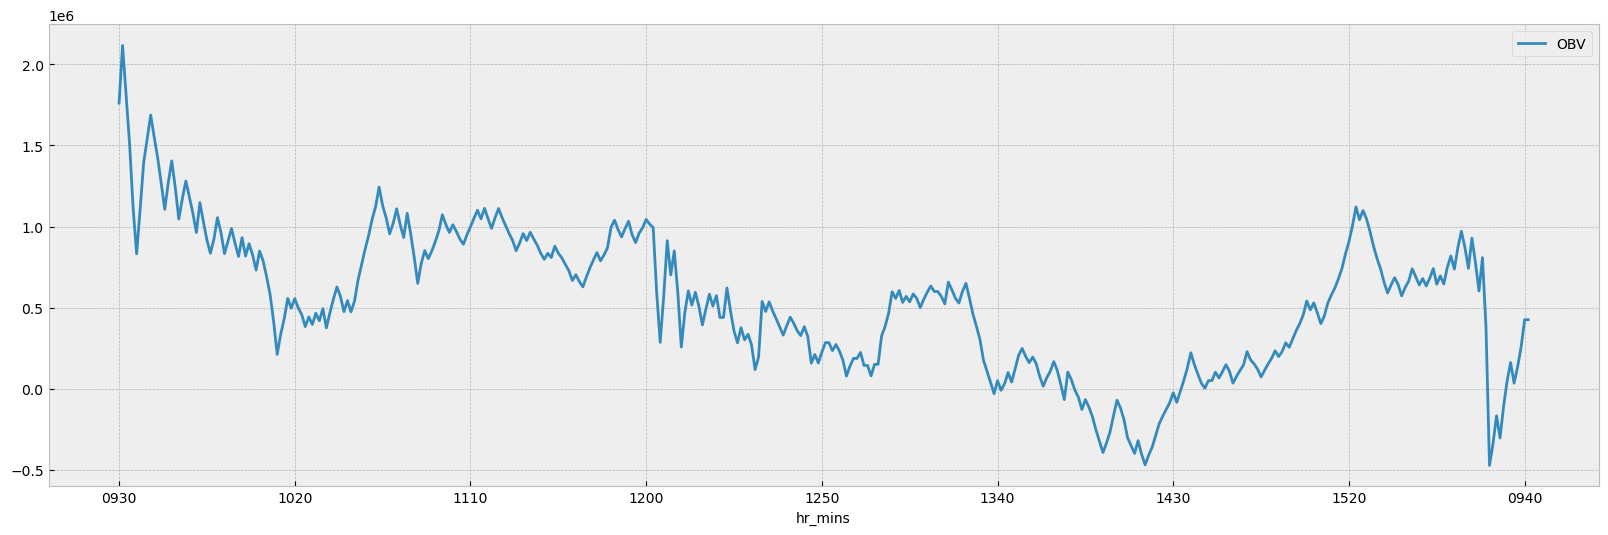

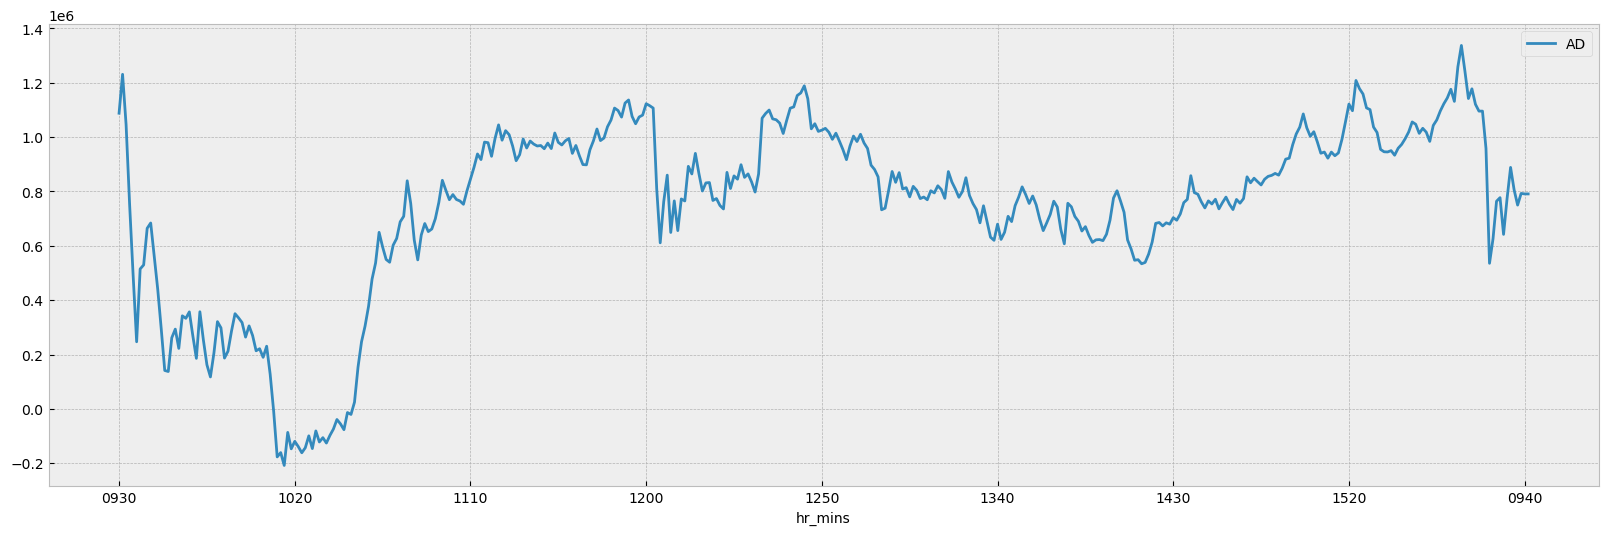

In [24]:
aapl[['OBV']].plot(figsize=(20,6))
aapl[['AD']].plot(figsize=(20,6)) 
 
plt.show()

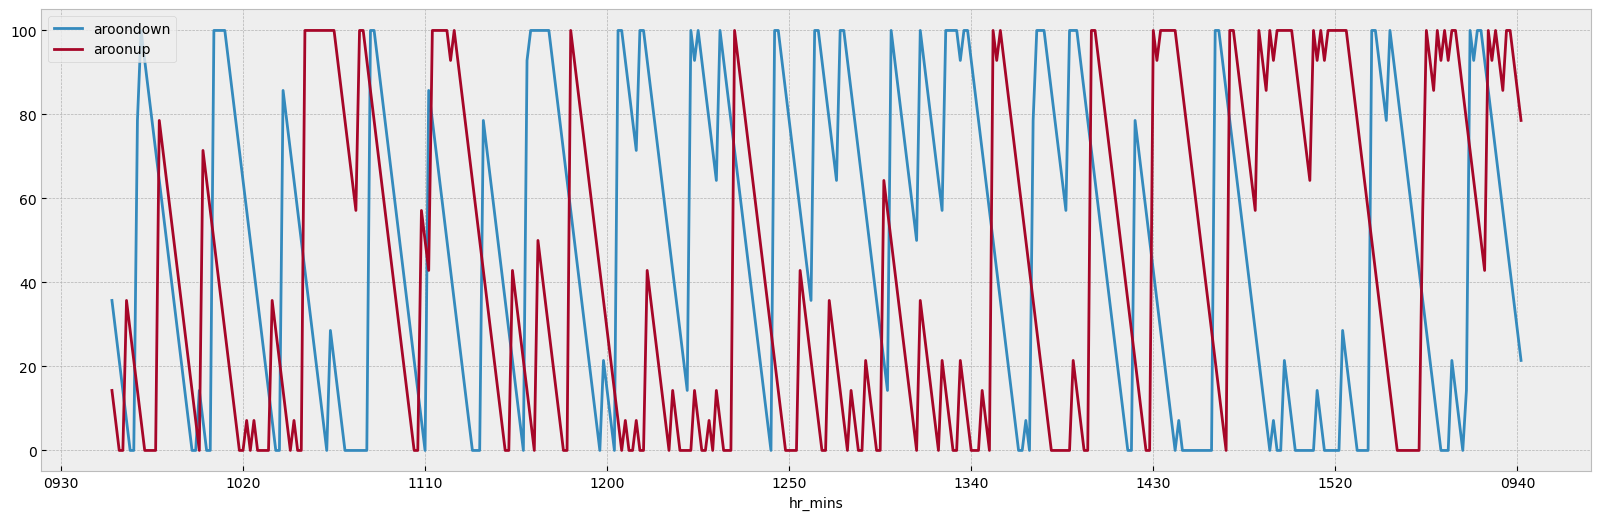

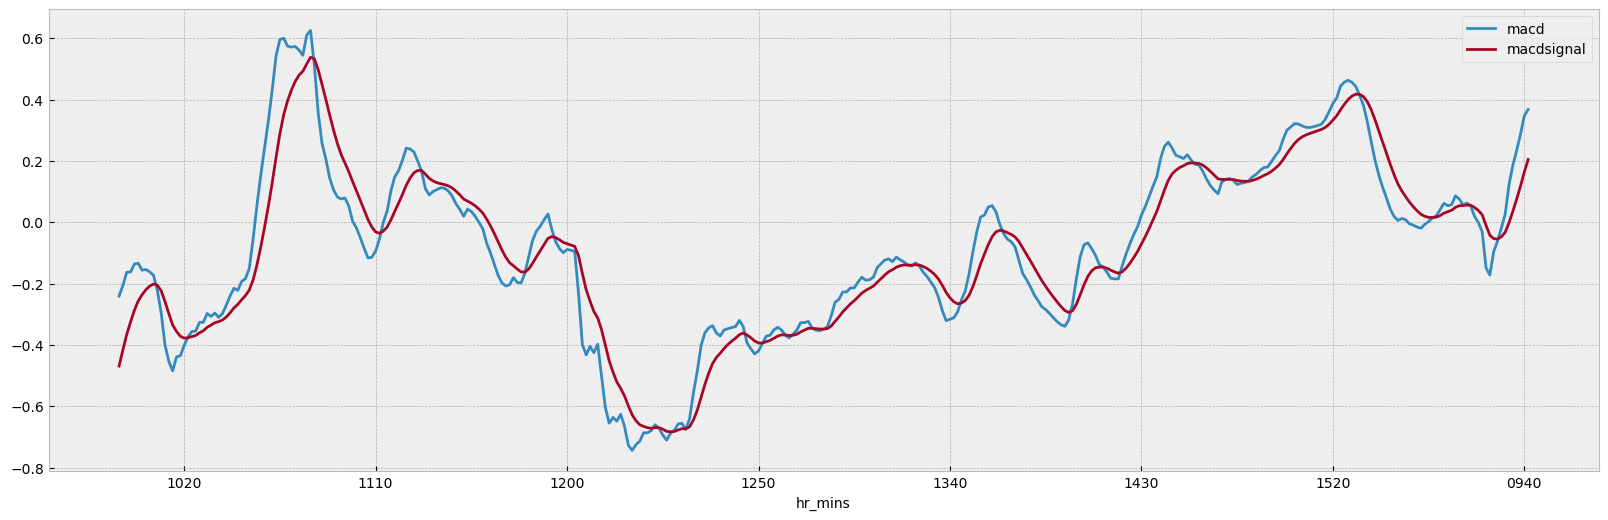

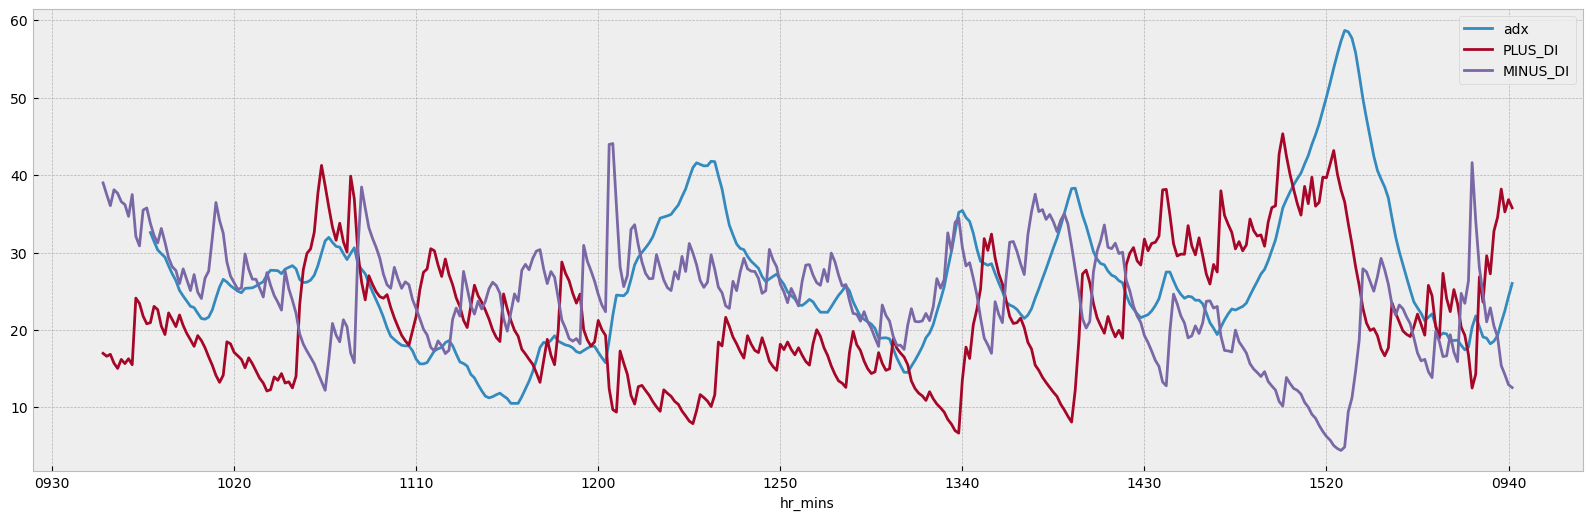

In [30]:
aapl[['aroondown','aroonup']].plot(figsize=(20,6))
aapl[['macd', 'macdsignal']].plot(figsize=(20,6)) 
aapl[['adx', 'PLUS_DI', 'MINUS_DI' ]].plot(figsize=(20,6)) 
# aapl['RSI'].plot(figsize=(12,6)) 
# aapl[['slowk','slowd']].plot(figsize=(12,6))
# aapl[['OBV']].plot(figsize=(16,6))
# aapl[['AD']].plot(figsize=(16,6)) 
 
plt.show()

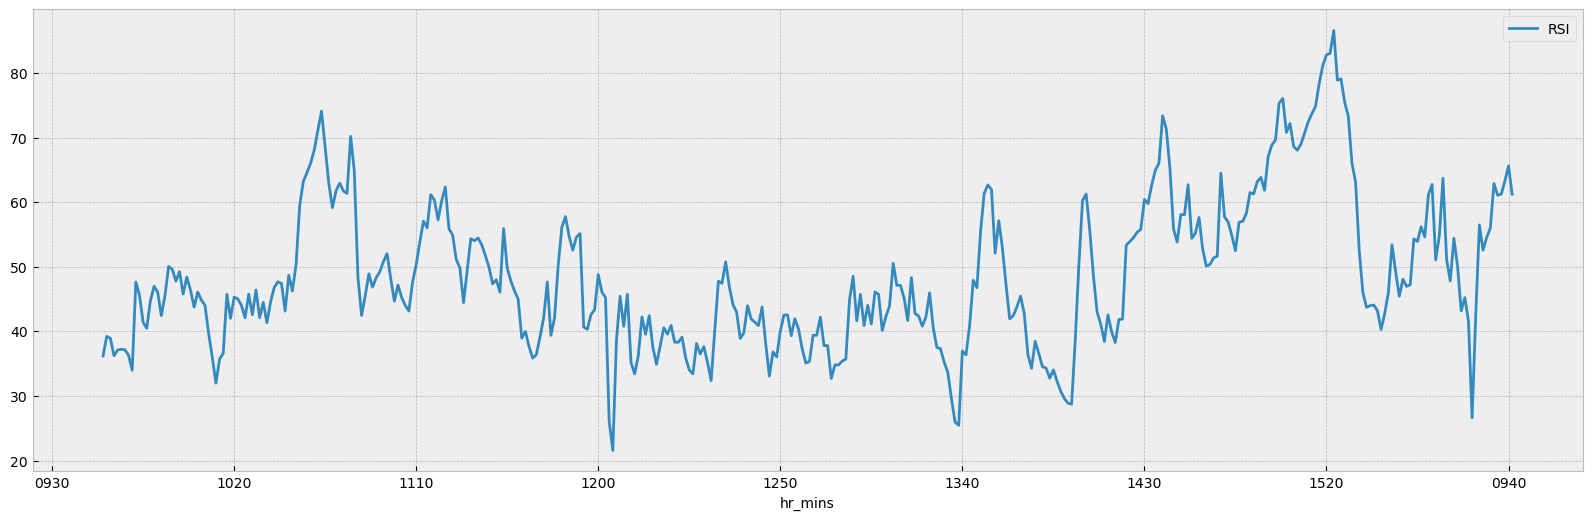

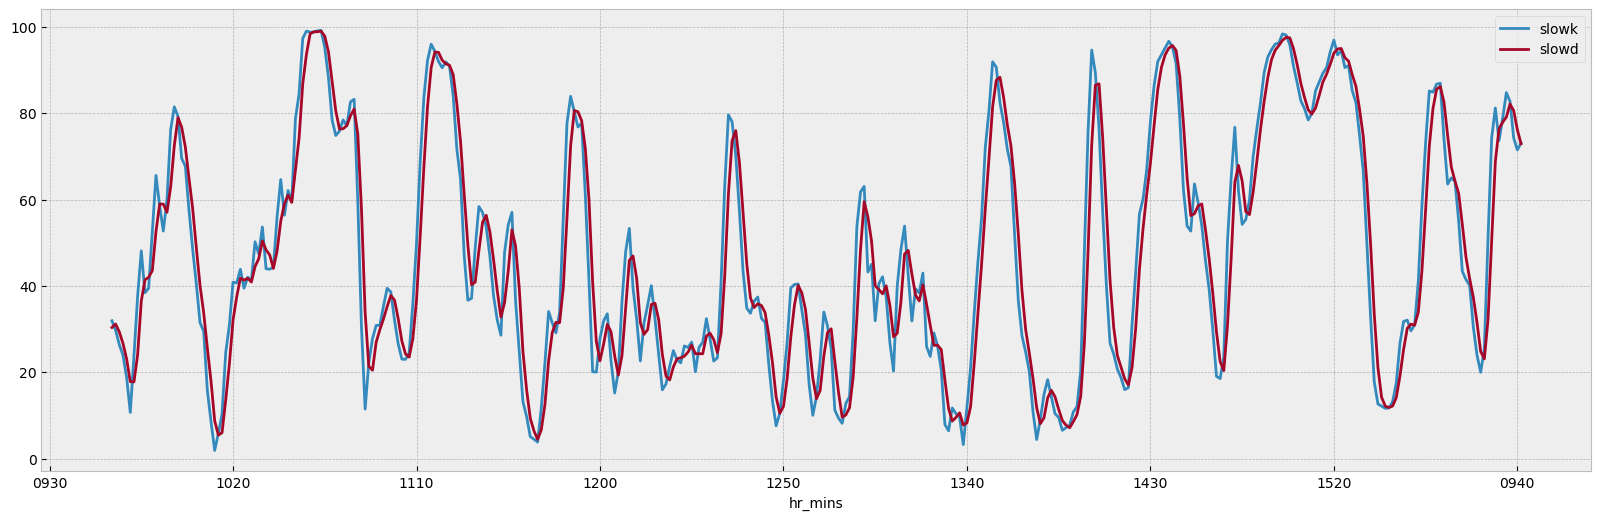

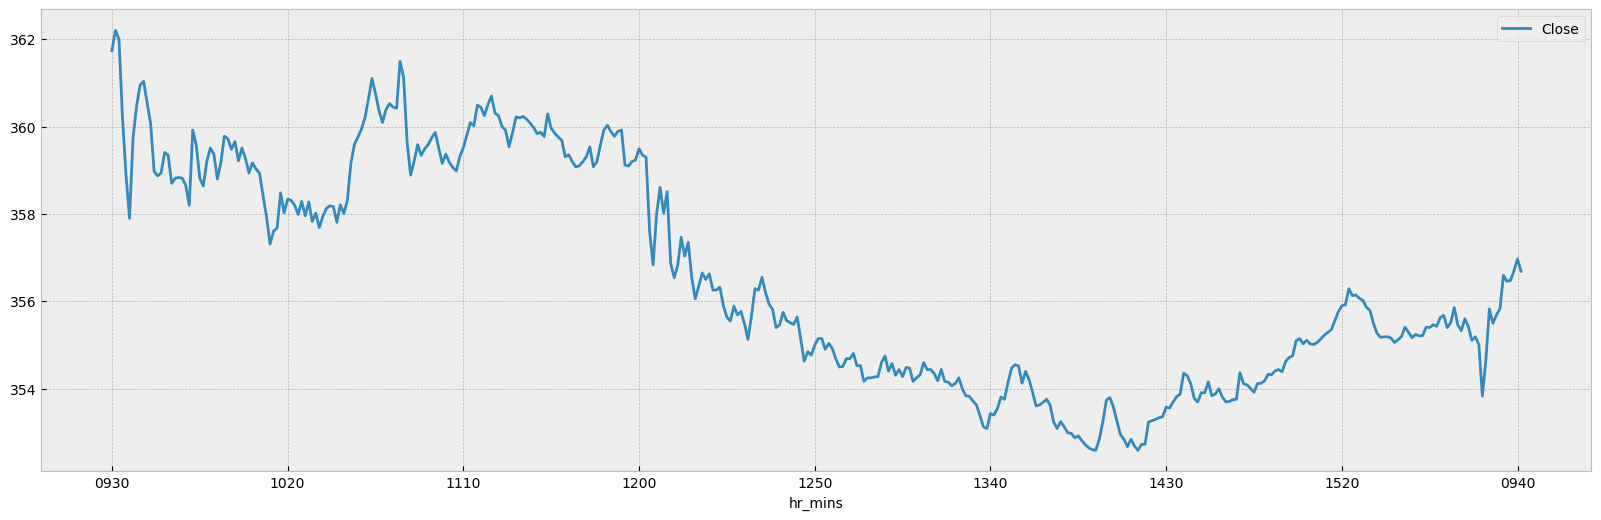

In [26]:
aapl[['RSI']].plot(figsize=(20,6)) 
aapl[['slowk','slowd']].plot(figsize=(20,6))
aapl[['Close']].plot(figsize=(20,6))
plt.show()

In [27]:
# Row details based on Column values 
# df.loc[df['column_name'] == some_value]
# aapl.loc[aapl['Datetime'] == '2023-07-14 11:34:00+05:30']

# aapl.iloc[i]
# Index based
# aapl.iloc[[139]]

In [100]:
# aapl

# Next Step
    1. Alerts for each required instances
    2. Go with flow

1. 